In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output="pandas") 

## Data Decription



### Mobile Price Classification

This dataset,on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc. We are predicting price range of the mobile.
* id:ID
* battery_power:Total energy a battery can store in one time measured in mAh
* blue:Has bluetooth or not
* clock_speed:speed at which microprocessor executes instructions
* dual_sim:Has dual sim support or not
* fc:Front Camera mega pixels
* four_g:Has 4G or not
* int_memory:Internal Memory in Gigabytes
* m_dep:Mobile Depth in cm
* mobile_wt:Weight of mobile phone
* n_cores:Number of cores of processor
* pc:Primary Camera mega pixels
* px_height:Pixel Resolution Height
* px_width:Pixel Resolution Width
* ram:Random Access Memory in Megabytes
* sc_h:Screen Height of mobile in cm
* sc_w:Screen Width of mobile in cm
* talk_time:longest time that a single battery charge will last when you are
* three_g:Has 3G or not
* touch_screen:Has touch screen or not
* wifi:Has wifi or not
* TARGET VARIABLE is price_range takes 4 different value

When we look at it in general, we see the features of different phones in the dataset. At first glance, I can comment on these features as follows:
* We try to predict one of the 4 different pricing ranges the phone could be based on the specs.
* I think 3G is also available on phones with 4G in general. Since 4G is a newer technology, 4G can be selected in case of correlation.

* Again, there are many binary variables in this dataset. We will calculate the correlation of these variables and make a model with the necessary ones, and we will use KNN and multinomial Logistic Regression as a model. Let's start!

The following lines of code to recognize the data:

In [68]:
df=pd.read_csv("../datasets/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.shape  #Give info our data shape 

(2000, 21)

In [8]:
df.info() # This code gives column names and information about include non variables or not and additionally give features dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.isnull().sum() #check if there is a null value between the values.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In order to avoid data leakage, separate the data as train and test as early as possible and start making all my observations on the train.

In [10]:
X = df[df.columns[:-1]]
y = df[["price_range"]] #target variable

By assigning the stratify attribute to y, the target value will keep its initial ratio when splitting into train and test

In [11]:
X_train_val_first, X_test_first, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1404, stratify=y)

In [168]:
X_train_val_first.shape

(1600, 20)

Delete the duplicate data in the train and test data:

In [12]:
X_train_val_first.drop_duplicates(inplace=True)
X_train_val_first.shape

(1600, 20)

In [13]:
X_test_first.shape

(400, 20)

In [14]:
X_test_first.drop_duplicates(inplace=True)
X_test_first.shape

(400, 20)

As we can see, there is no repeating value in the data.

In [15]:
X_train_val=X_train_val_first.copy()
X_test=X_test_first.copy()

Again, as we did in the first question of the assignment, in a relatively large dataset there are many properties that have little distinct value, so I looked at their properties to decide whether they were binary or numerical. I have determined measurable values as numeric, binary ones as direct binary, and unmeasurable values as categorical values.

In [17]:
for column in X_train_val.columns:
    print("Feature: ", column, ", value Counts: ",len(X_train_val[column].value_counts()))
    
    
#blue, dual_sim, four_g, three_g, touch_screen, n_cores, wifi  are binary value variables.

#i took battery_power, clock_speed,int_memory,m_dep, mobile_wt, talk_time, px_height, px_width, ram, sc_h, sc_w, pc  are continues variables. 
#Because this features increas continuously, so i decided as continuous variable for correlation check.

Feature:  battery_power , value Counts:  980
Feature:  blue , value Counts:  2
Feature:  clock_speed , value Counts:  26
Feature:  dual_sim , value Counts:  2
Feature:  fc , value Counts:  20
Feature:  four_g , value Counts:  2
Feature:  int_memory , value Counts:  63
Feature:  m_dep , value Counts:  10
Feature:  mobile_wt , value Counts:  121
Feature:  n_cores , value Counts:  8
Feature:  pc , value Counts:  21
Feature:  px_height , value Counts:  1011
Feature:  px_width , value Counts:  980
Feature:  ram , value Counts:  1310
Feature:  sc_h , value Counts:  15
Feature:  sc_w , value Counts:  19
Feature:  talk_time , value Counts:  19
Feature:  three_g , value Counts:  2
Feature:  touch_screen , value Counts:  2
Feature:  wifi , value Counts:  2


In [18]:
#analyzing some values for detecting variables numeric or categorical
print(X_train_val.pc.value_counts())
print(X_train_val.sc_h.value_counts())
print(X_train_val.sc_w.value_counts())
print(X_train_val.talk_time.value_counts())
print(X_train_val.m_dep.value_counts())
print(X_train_val.int_memory.value_counts())
print(X_train_val.clock_speed.value_counts())
print(X_train_val.fc.value_counts())

10    98
20    95
7     94
9     93
1     86
14    83
17    80
0     79
15    77
4     76
6     75
2     74
12    73
13    71
16    71
8     68
3     66
18    65
19    63
11    63
5     50
Name: pc, dtype: int64
17    156
7     127
14    122
12    118
16    117
15    105
13    104
8     102
10    101
19     96
18     96
9      95
11     93
6      90
5      78
Name: sc_h, dtype: int64
1     174
4     150
0     149
3     145
5     139
2     126
6     104
7     103
8      93
10     81
9      77
11     69
12     56
13     37
15     26
14     25
16     22
17     17
18      7
Name: sc_w, dtype: int64
4     99
7     97
15    96
16    89
19    88
11    87
13    86
6     85
10    85
17    83
14    82
12    82
20    82
8     80
18    78
9     78
2     77
3     74
5     72
Name: talk_time, dtype: int64
0.1    249
0.8    180
0.5    171
0.2    164
0.3    161
0.7    158
0.9    151
0.6    145
0.4    141
1.0     80
Name: m_dep, dtype: int64
16    39
14    36
30    36
27    36
7     34
      ..
4     1

We can make Pearson correlations over numeric ones. So i collected numerical variables on X_train_for_corr dataframe.

In [19]:
X_train_for_corr=X_train_val[["battery_power", "clock_speed","int_memory","m_dep", "mobile_wt", "talk_time", "px_height", "px_width", "ram", "sc_h", "sc_w", "pc"]]

In [20]:
X_train_for_corr.corr().style.background_gradient(cmap = "Blues")

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,talk_time,px_height,px_width,ram,sc_h,sc_w,pc
battery_power,1.000000,0.000500,-0.012646,0.026900,0.005723,0.069447,0.026351,0.015703,-0.009641,-0.033720,-0.014031,0.035832
clock_speed,0.000500,1.000000,0.005754,-0.028314,0.011036,-0.028752,-0.023853,-0.012523,0.010016,-0.027581,-0.003887,-0.014916
int_memory,-0.012646,0.005754,1.000000,0.022698,-0.040642,0.007773,0.010966,-0.002623,0.036877,0.049020,0.014085,-0.027521
m_dep,0.026900,-0.028314,0.022698,1.000000,0.005962,0.031548,0.019229,0.011767,-0.016507,-0.027869,-0.010118,0.041393
mobile_wt,0.005723,0.011036,-0.040642,0.005962,1.000000,0.028061,0.003268,0.000329,-0.010076,-0.040875,-0.023740,0.033316
talk_time,0.069447,-0.028752,0.007773,0.031548,0.028061,1.000000,-0.032999,-0.008161,-0.002915,-0.011906,-0.030259,0.021844
px_height,0.026351,-0.023853,0.010966,0.019229,0.003268,-0.032999,1.000000,0.500557,-0.020611,0.062827,0.040192,-0.023682
px_width,0.015703,-0.012523,-0.002623,0.011767,0.000329,-0.008161,0.500557,1.000000,0.020746,0.020484,0.033018,0.000114
ram,-0.009641,0.010016,0.036877,-0.016507,-0.010076,-0.002915,-0.020611,0.020746,1.000000,0.020157,0.029494,0.021717
sc_h,-0.033720,-0.027581,0.049020,-0.027869,-0.040875,-0.011906,0.062827,0.020484,0.020157,1.000000,0.505159,0.010583


Since there is no value of 0.8 and above, we can say that there is no correlation that will cause linear dependence in the numerical values of the data.

In [21]:
X_train_val.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

I assigned the values we determined categorically to two different values, categorical and binary, in order to use them for different purposes.

In [24]:
X_train_cat=X_train_val[["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi","n_cores"]]

In [25]:
X_train_binary=X_train_val[["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]]

Let's try the Chi-Square test, which replaces the categorical correlation calculation between binary features.

In [29]:
from scipy.stats import chi2_contingency
all_results=pd.DataFrame(index=X_train_cat.columns)
col_list=list()
for binary_var in X_train_cat.columns:
    print(binary_var)
    col_list=[]
    for otherbinary_var in X_train_cat.columns:
        
        CrosstabResult=pd.crosstab(index=X_train_val[binary_var],columns=X_train_val[otherbinary_var])
        #print(CrosstabResult)
        ChiSqResult = chi2_contingency(CrosstabResult)
        col_list.append(ChiSqResult[1])
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
    all_results[binary_var]=col_list
all_results

blue
dual_sim
four_g
three_g
touch_screen
wifi
n_cores


,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores
blue,0.000000,0.274787,1.000000e+00,3.282898e-01,0.513008,0.175651,0.496705
dual_sim,0.274787,0.000000,5.916166e-01,4.074722e-01,0.272649,0.485838,0.513606
four_g,1.000000,0.591617,0.000000e+00,2.556163e-118,0.313802,0.612101,0.076663
three_g,0.328290,0.407472,2.556163e-118,0.000000e+00,0.332409,0.367794,0.480701
touch_screen,0.513008,0.272649,3.138023e-01,3.324087e-01,0.000000,0.581233,0.515318
wifi,0.175651,0.485838,6.121010e-01,3.677937e-01,0.581233,0.000000,0.990930
n_cores,0.496705,0.513606,7.666280e-02,4.807013e-01,0.515318,0.990930,0.000000


In [30]:
chi_check=all_results>0.05
chi_check
#dual sim and blue
#three_g and blue
#wifi and blue 

,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores
blue,False,True,True,True,True,True,True
dual_sim,True,False,True,True,True,True,True
four_g,True,True,False,False,True,True,True
three_g,True,True,False,False,True,True,True
touch_screen,True,True,True,True,False,True,True
wifi,True,True,True,True,True,False,True
n_cores,True,True,True,True,True,True,False


As I mentioned above, there is a correlation between 3G and 4G, we can eliminate one of them. I'm going to eliminate it on the grounds that 3G is an older technology.

Let's perform the Point Biserial Test to find the correlation between categorical variables and numeric variables:

In [31]:
from scipy import stats

cor_cat_vs_cont=pd.DataFrame()
list_corr=list()
for a in X_train_cat.columns:
    list_corr=list()
   
    for b in X_train_for_corr.columns:
        stats.pointbiserialr(X_train_cat[a],X_train_for_corr[b])
        
        benzerlik=stats.pointbiserialr(X_train_cat[a],X_train_for_corr[b])
        list_corr.append(benzerlik)
        if benzerlik[1]<0.05:
            print(a,  b, benzerlik)
   

dual_sim ram SignificanceResult(statistic=0.0573352823818848, pvalue=0.02181890686496388)
wifi px_height SignificanceResult(statistic=0.06558774213957677, pvalue=0.008683102143349707)


When calculating the correlation between numeric and categorical variables, first of all, if the p value is less than 0.05, the correlation calculation reflects the truth, otherwise it does not matter. When we check this out, there doesn't seem to be a remarkable number of correlations.

1    822
0    778
Name: four_g, dtype: int64
1    1214
0     386
Name: three_g, dtype: int64


[Text(0.5, 1.0, '3G')]

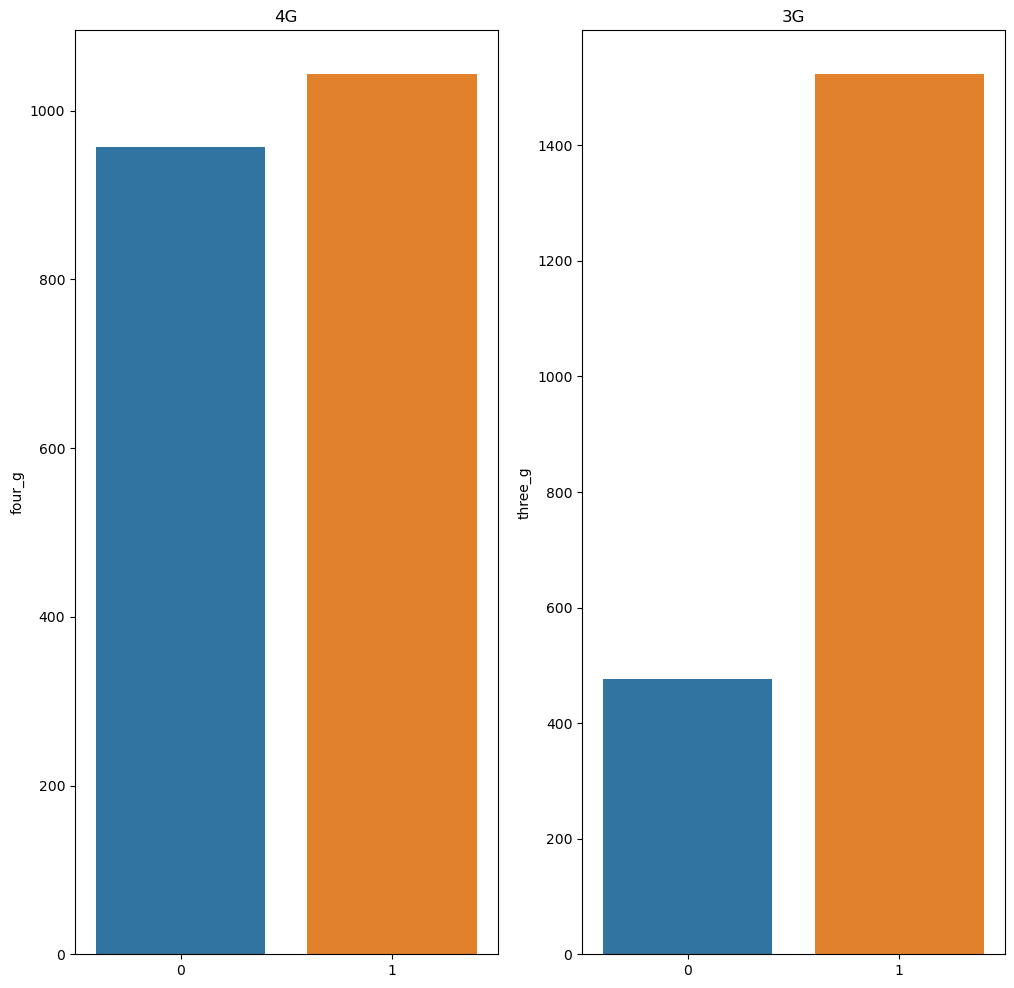

In [32]:
print(X_train_val.four_g.value_counts())
print(X_train_val.three_g.value_counts())
fig, axes = plt.subplots(1, 2, figsize = (12, 12))
axes = axes.flatten()
sns.barplot(ax=axes[0], data=df, x=df.four_g.value_counts().index, y=df.four_g.value_counts()).set(title="4G")
sns.barplot(ax=axes[1], data=df, x=df.three_g.value_counts().index, y=df.three_g.value_counts()).set(title="3G")

In [33]:
X_train_val.drop("three_g", axis=1,inplace=True)
X_test.drop("three_g", axis=1,inplace=True)

[Text(0.5, 1.0, 'WiFi')]

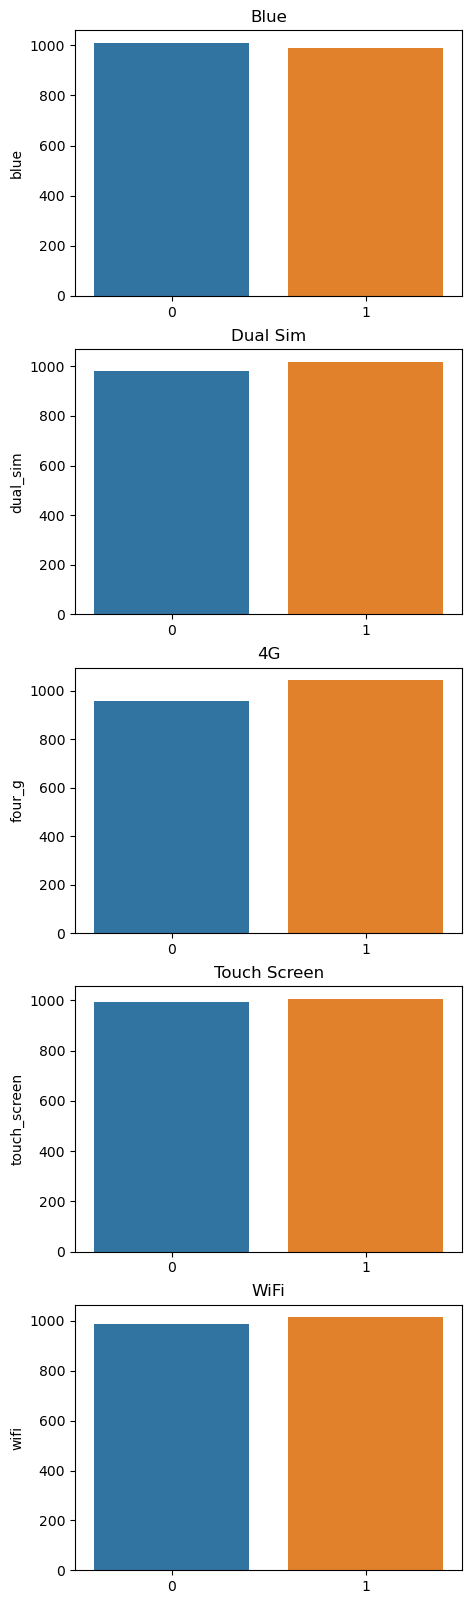

In [188]:
fig, axes = plt.subplots(5, 1, figsize = (5, 20))
axes = axes.flatten()
sns.barplot(ax=axes[0], data=df, x=df.blue.value_counts().index, y=df.blue.value_counts()).set(title="Blue")
sns.barplot(ax=axes[1], data=df, x=df.dual_sim.value_counts().index, y=df.dual_sim.value_counts()).set(title="Dual Sim")
sns.barplot(ax=axes[2], data=df, x=df.four_g.value_counts().index, y=df.four_g.value_counts()).set(title="4G")
sns.barplot(ax=axes[3], data=df, x=df.touch_screen.value_counts().index, y=df.touch_screen.value_counts()).set(title="Touch Screen")
sns.barplot(ax=axes[4], data=df, x=df.wifi.value_counts().index, y=df.wifi.value_counts()).set(title="WiFi")
#Very balanced distubition 

#### Deep analysis with target variables and Choose classification metric

As you can see, the data is evenly distributed, so I will prefer "accuracy" as a metric, which has already default metric classification algorithm.

Also, the data is so smooth it felt like synthetic

[Text(0.5, 1.0, 'Frequency of pricing range values')]

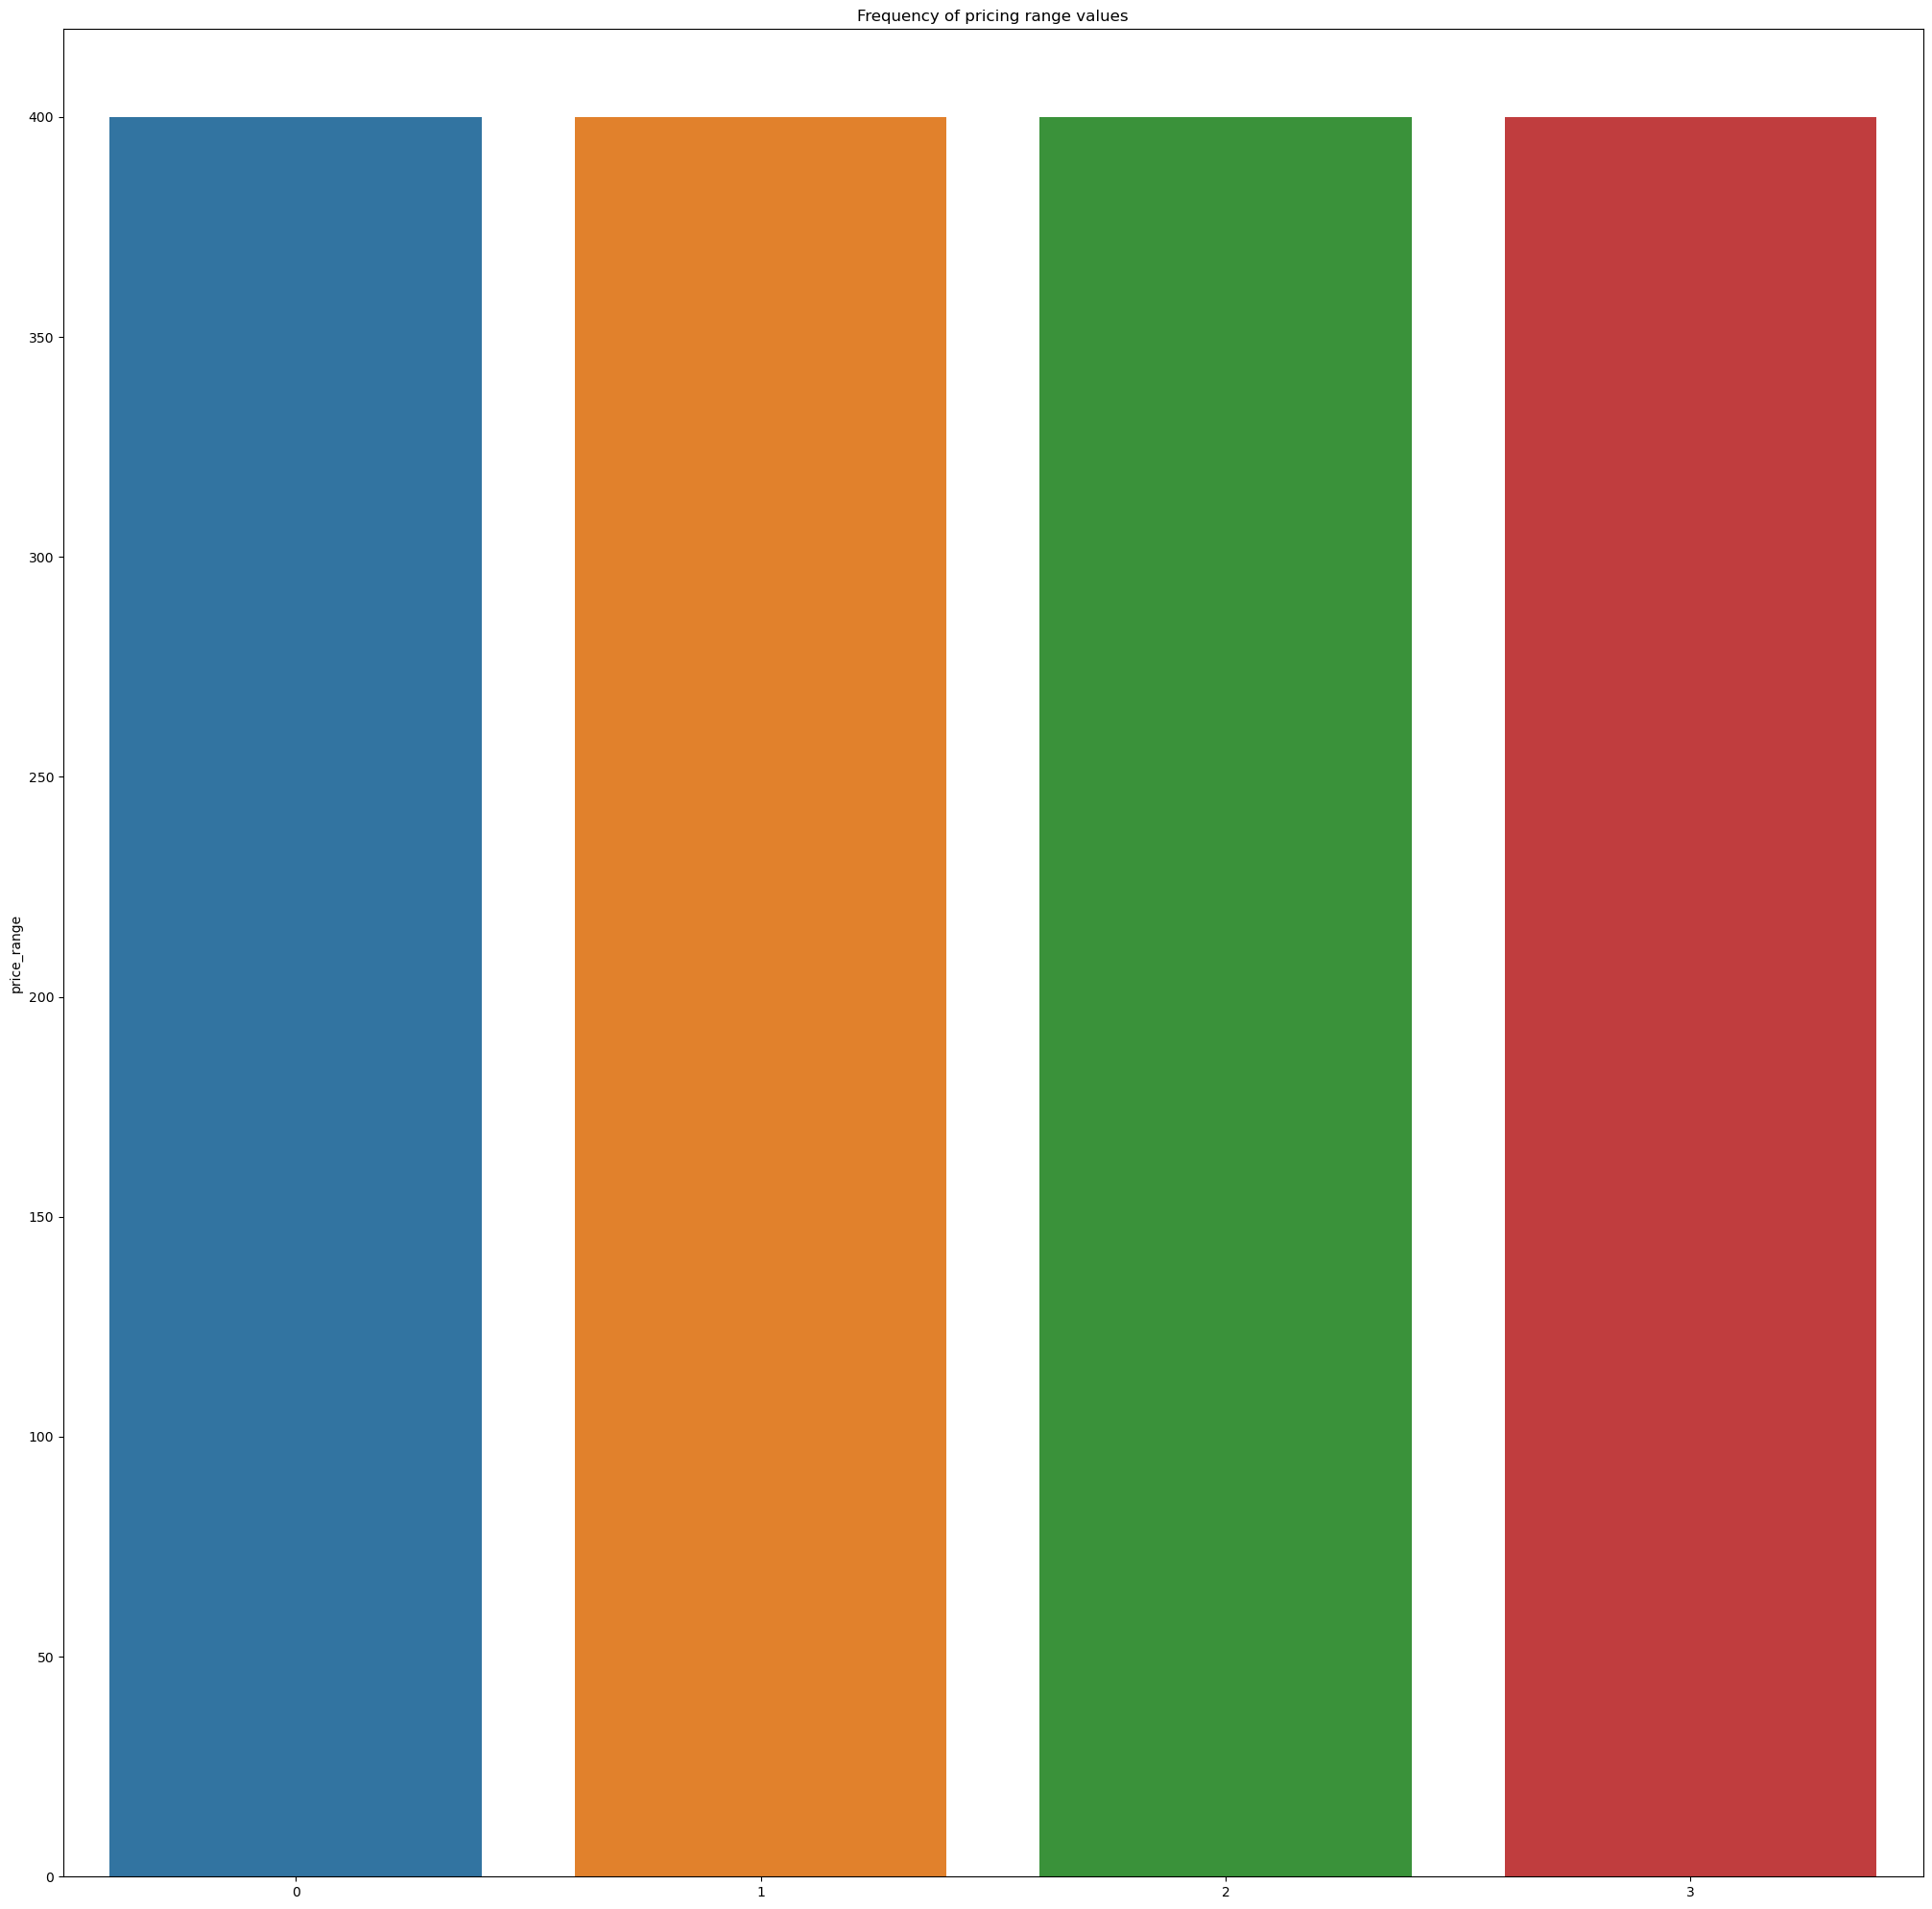

In [39]:
sns.barplot( data=df, x=y_train_val.price_range.value_counts().index, y=y_train_val.price_range.value_counts()).set(title="Frequency of pricing range values")


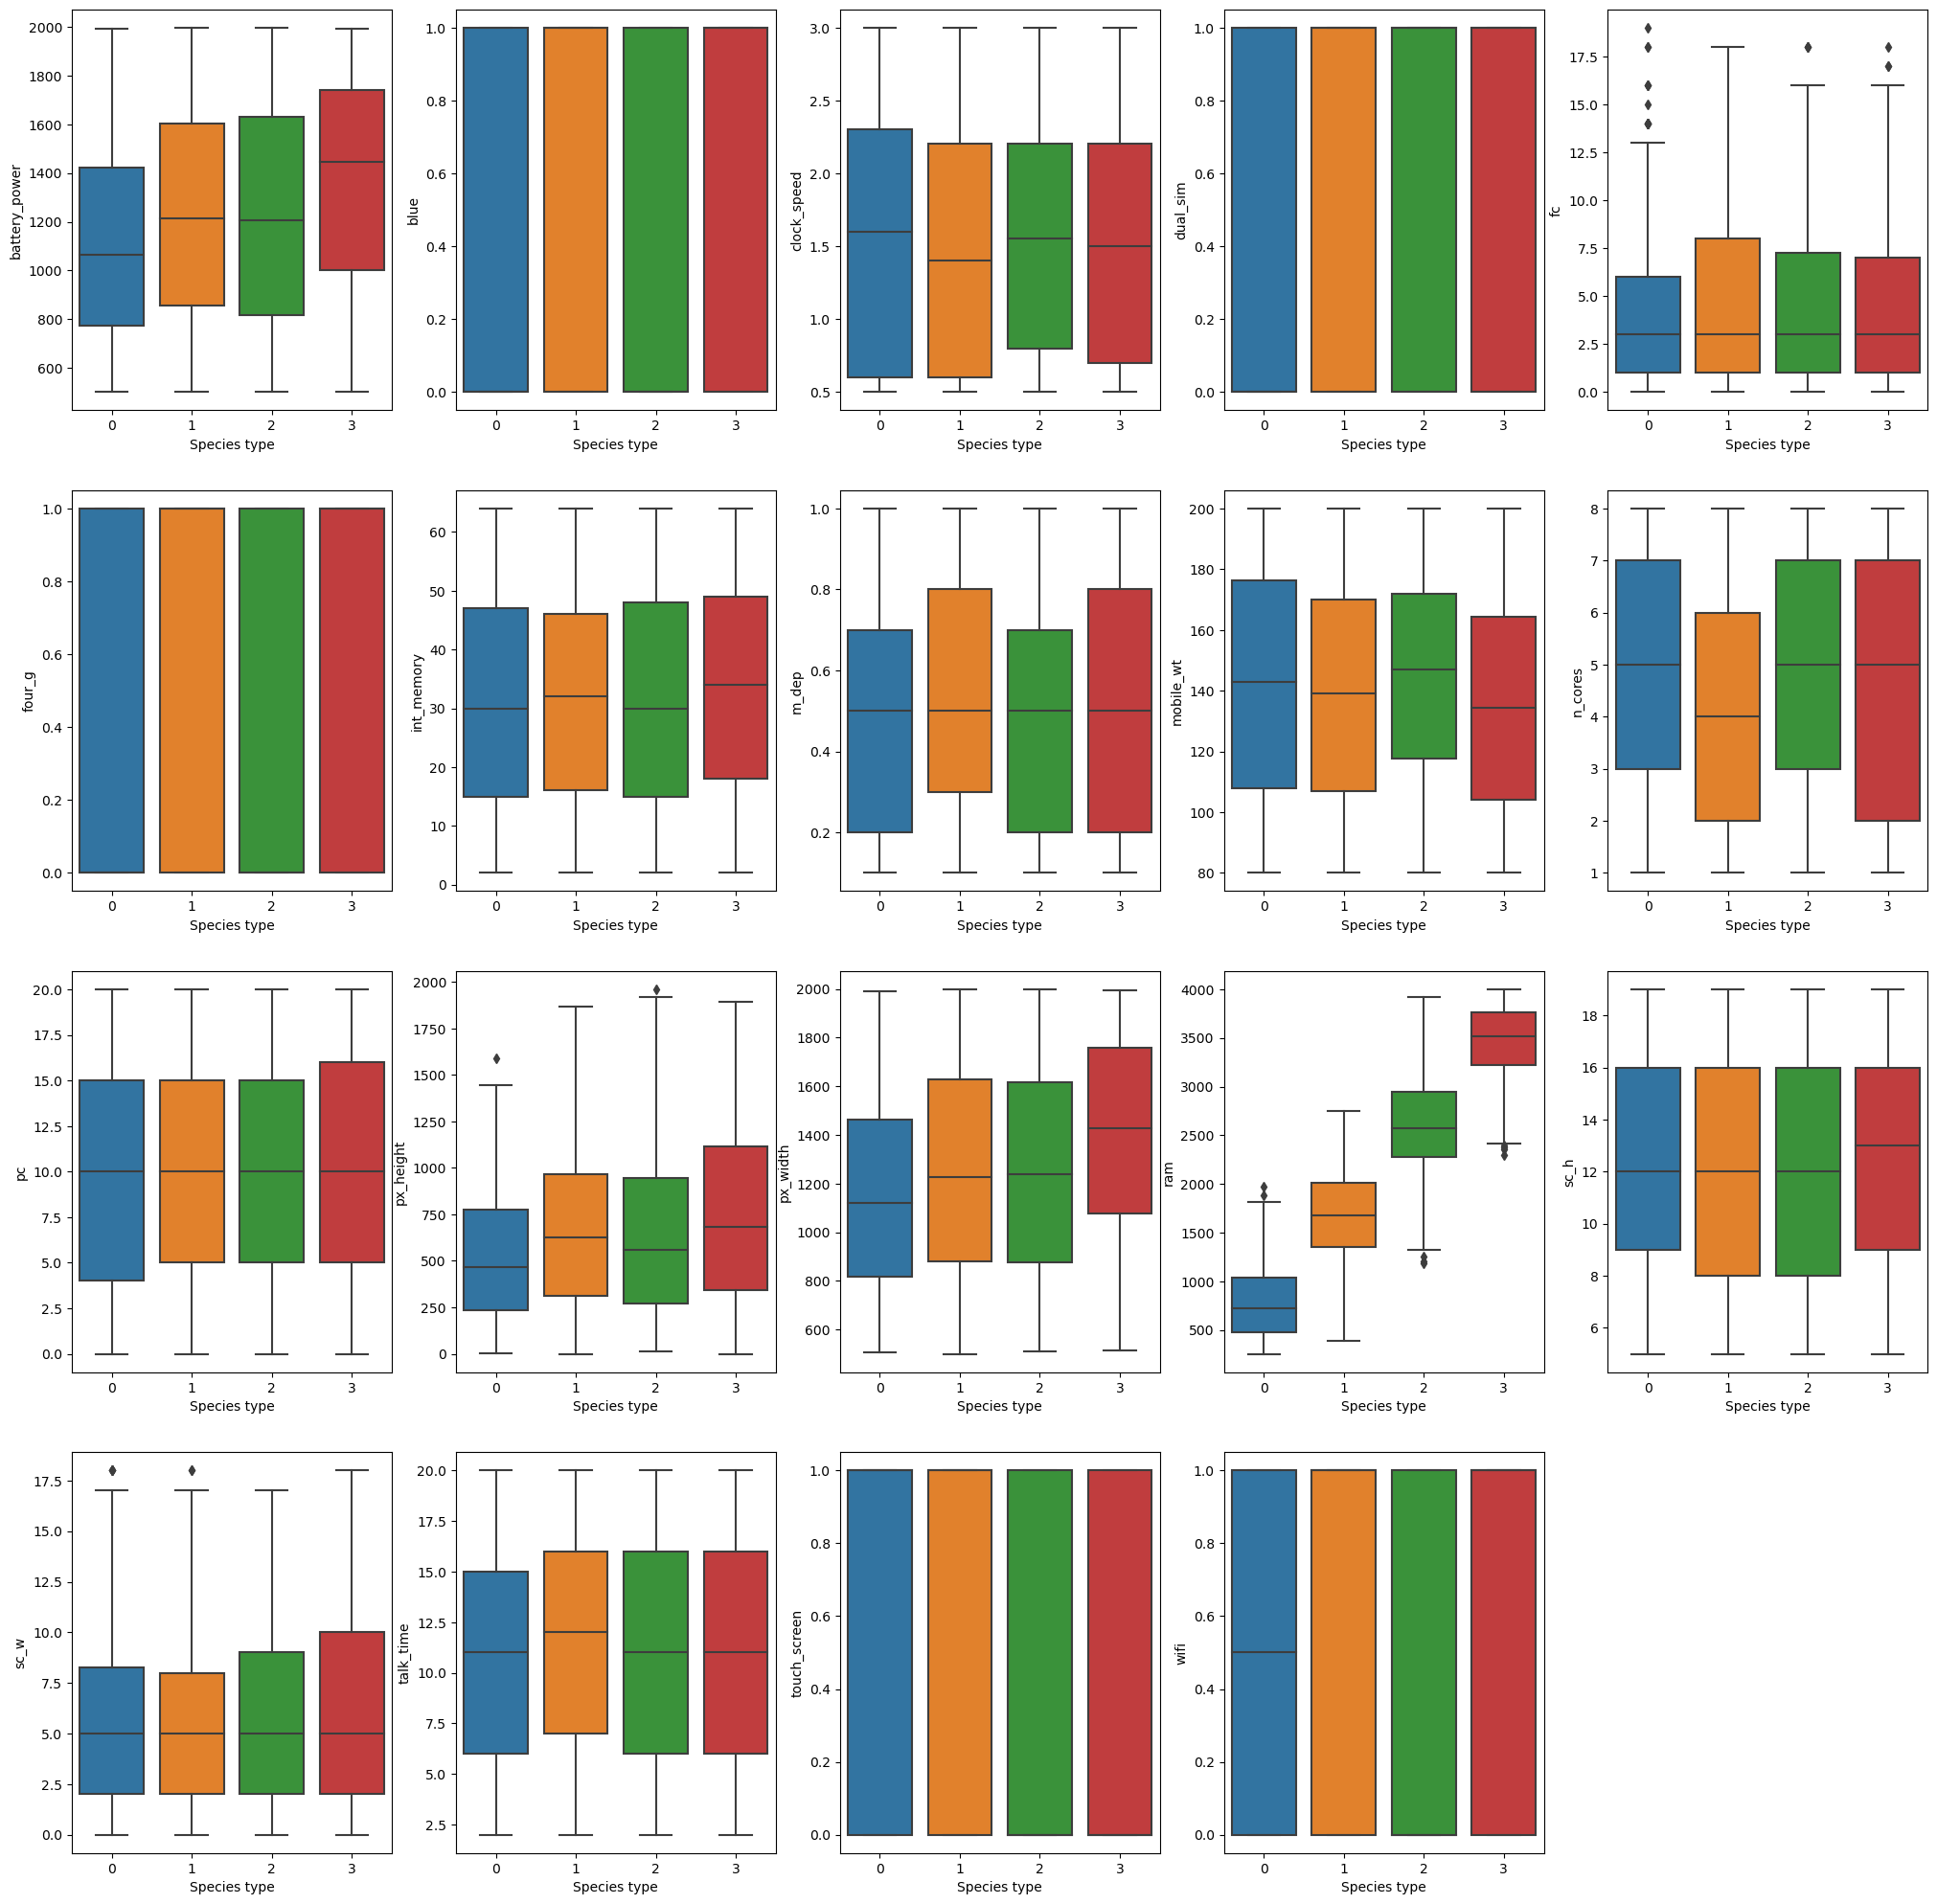

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [25, 25]



price_features =list(X_train_val.columns)


for i, feat in enumerate(price_features, start=1):
      
    plt.subplot(4,5,i)
    
    g = sns.boxplot(x=y_train_val.price_range, y=X_train_val[feat]) 
    
    g.set_xlabel('Species type')
    
    g.set_ylabel(smoking_features[(i-1)])
    
plt.show();  

In general, we can see that 4 different price estimates show similar features, but differ in ram and battery power. In other words, we can say that the battery power and ram value affect the phone price range more visibly.

In [40]:
X_train_cat.columns

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi',
       'n_cores'],
      dtype='object')

In [43]:
X_train_val_first.columns #no drop any variables on this dataframe

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [44]:
X_train_val.columns #drop 3G variable based on chi-square correlation on this dataframe

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'touch_screen', 'wifi'],
      dtype='object')

First, let's apply gridsearch to find the best values of the KNN algorithm on the data we haven't dropped:

Dataset is separated as categorical and numerical. I handled these two types in different pipelines and combined them with ColumnTransformer and created a knn pipeline.

As you know, the KNN algorithm looks at the nearest "n" neighbors of the relevant data. The number of neighbors n is very critical here, let's calculate a grid search to try every value from 1 to 30 to choose the best one. 1 KNN will be overfitting. As the value increases, this fit will go towards underfit.

In [45]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',sparse_output=False)
)
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, ['blue', 'dual_sim', 'four_g', 'touch_screen', 'wifi',
       'n_cores','three_g']),
        ('numerical', numeric_transformer, ['battery_power', 'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',])
    ])
knn_pipe = make_pipeline(KNeighborsClassifier(metric='minkowski', p=2))

param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 30))}

#like we using train_test_split using StratifiedKFold the folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1404) 

grid_search = GridSearchCV(estimator = knn_pipe, param_grid = param_grid, 
                           scoring='accuracy', cv = kcv_index, 
                           return_train_score=True) 

In [46]:
grid_search.fit(X_train_val_first, y_train_val.price_range)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29]},
             return_train_score=True, scoring='accuracy')

In [47]:
print("Optimum Model:", grid_search.best_params_) #give parameters from best score 
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100)) #give best score

Optimum Model: {'kneighborsclassifier__n_neighbors': 17}
CV Validation Accuracy: 93.50 %


In [48]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val_first, y_train_val)*100))

print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test_first, y_test)*100))

Accuracy on train+val data: 95.00 %
Accuracy on test data: 92.75 %


In the same way, let's try the dataset where we dropped 3G using Grid Search.

In [49]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',sparse_output=False)
)
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, ['blue', 'dual_sim', 'four_g', 'touch_screen', 'wifi',
       'n_cores']),
        ('numerical', numeric_transformer, ['battery_power', 'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',])
    ])
knn_pipe = make_pipeline(KNeighborsClassifier(metric='minkowski', p=2))

#defining parameter range
param_grid = {'kneighborsclassifier__n_neighbors': list(range(1, 30))}

#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1773) 

grid_search = GridSearchCV(estimator = knn_pipe, param_grid = param_grid, 
                           scoring='accuracy', cv = kcv_index, #accuracy is the default metric
                           return_train_score=True)

In [50]:
grid_search.fit(X_train_val, y_train_val.price_range)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29]},
             return_train_score=True, scoring='accuracy')

In [51]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'kneighborsclassifier__n_neighbors': 17}
CV Validation Accuracy: 93.50 %


In [52]:
grid_search.best_estimator_

Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=17))])

In [53]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val, y_train_val)*100))

print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test, y_test)*100))

Accuracy on train+val data: 95.00 %
Accuracy on test data: 92.75 %


We've seen that the presence of 3G doesn't matter at all in data forecasting. So we can ignore this when collecting new data. By removing it, we did not take up any unnecessary space.

In [54]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',sparse_output=False)
)
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, ['blue', 'dual_sim', 'four_g', 'touch_screen', 'wifi',
       'n_cores']),
        ('numerical', numeric_transformer, ['battery_power', 'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',])
    ])
#The choice of the algorithm depends on the penalty chosen.
lr_pipe = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(solver='saga',multi_class='multinomial',max_iter=2000))

#Define parameter range
param_grid = [{'logisticregression__penalty' : ['l1', 'l2','none'],
               'logisticregression__C' : np.logspace(-1, 1, 20),
               },
              {'logisticregression__penalty' : ['elasticnet'],
               'logisticregression__C' : np.logspace(-1, 1, 20), 
               'logisticregression__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               }
              ]
              
               
#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1404) 

grid_search = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)

In [55]:
grid_search.fit(X_train_val, y_train_val.price_range)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1404, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['blue',
                                                                          'dual_sim',
                                                                          'four_g',
                                                                          'touch_screen',
                                                                          'wifi',
                                                                          'n_cores']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('stan...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__l1_ratio': [0.1, 0.2, 0.3, 0.4,
                                                           0.5, 0.6, 0.7, 0.8,
                                                           0.9],
                          'logisticregression__penalty': ['elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [56]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'logisticregression__C': 0.615848211066026, 'logisticregression__penalty': 'l1'}
CV Validation Accuracy: 97.37 %


In [57]:
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'touch_screen', 'wifi',
                                                   'n_cores']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['battery_power',
                                                   'clock_speed', 'fc',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', 'sc_h', 'sc_w',
                                                   'talk_time'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.615848211066026, max_iter=2000,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga'))])

In [58]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val, y_train_val)*100))

print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test, y_test)*100))

Accuracy on train+val data: 98.62 %
Accuracy on test data: 96.25 %


Let's try logistic regression. When I ran the same code before (I tried values between -4 and 4), a C value of 0.6 came, this time let's try to catch a more optimal C value by returning 20 values between -1 and 1.

In [59]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',sparse_output=False)
)
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, ['blue', 'dual_sim', 'four_g', 'touch_screen', 'wifi',
       'n_cores']),
        ('numerical', numeric_transformer, ['battery_power', 'clock_speed',  'fc', 
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',])
    ])
#The choice of the algorithm depends on the penalty chosen.
lr_pipe = make_pipeline(preprocessor, LogisticRegression(solver='saga',multi_class='multinomial',max_iter=2000))

#Define parameter range

param_grid = [{'logisticregression__penalty' : ['l1', 'l2','none'],
               'logisticregression__C' : np.logspace(-1, 1, 20),
               },
    {'logisticregression__penalty' : ['elasticnet'],
               'logisticregression__C' : np.logspace(-1, 1, 20), 
               'logisticregression__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               }
              ]
               
#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1404) 

grid_search = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)

I added two different dicts to the param_grid because the **l1_ratio** ratio changed when elasticnet was used differently from the others. L1_ratio is 0 in L2 regulation, L1_ratio is 1 in L1 and a regulation calculation is made by using l1 and l2 regulation together in intermediate values.

In [60]:
grid_search.fit(X_train_val, y_train_val.price_range)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1404, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['blue',
                                                                          'dual_sim',
                                                                          'four_g',
                                                                          'touch_screen',
                                                                          'wifi',
                                                                          'n_cores']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('stan...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__l1_ratio': [0.1, 0.2, 0.3, 0.4,
                                                           0.5, 0.6, 0.7, 0.8,
                                                           0.9],
                          'logisticregression__penalty': ['elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [61]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation Accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'logisticregression__C': 0.615848211066026, 'logisticregression__l1_ratio': 0.9, 'logisticregression__penalty': 'elasticnet'}
CV Validation Accuracy: 97.12 %


Judging by the L1 ratio, an elasticnet regression close to l1 seems to be the best case.

In [62]:
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'touch_screen', 'wifi',
                                                   'n_cores']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['battery_power',
                                                   'clock_speed', 'fc',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', 'sc_h', 'sc_w',
                                                   'talk_time'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.615848211066026, l1_ratio=0.9,
                                    max_iter=2000, multi_class='multinomial',
                                    penalty='elasticnet', solver='saga'))])

In [63]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val, y_train_val)*100))

print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test, y_test)*100))

Accuracy on train+val data: 98.56 %
Accuracy on test data: 96.25 %


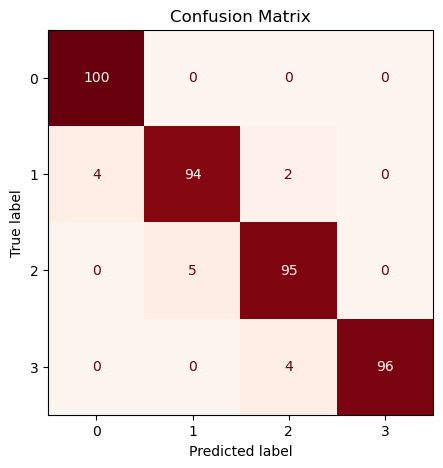

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize'] = [5, 5]
cm = ConfusionMatrixDisplay.from_estimator(grid_search, 
                                           X_test, y_test,  
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

In [67]:
from sklearn.metrics import classification_report

y_test_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       0.95      0.94      0.94       100
           2       0.94      0.95      0.95       100
           3       1.00      0.96      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



### Conclusion
When we look at the result:
* It is possible to produce models with the same success, by making a correlation ratio between the data, removing unnecessary data and not keeping data for nothing.
* Likewise, we have seen that the best ratio of Logistic and KNN models, which we use in two different ways, is Logistic regression using elasticnet penalty. Considering that we have too many features and some features have similar logic, we have ensured that our model has the best success by penalizing some features without correlation.

Thanks to classification report and confusion metric, we can actually see different metrics. However, I think it is useful to use accuracy metrics in this balanced data set.

In [64]:
import session_info
session_info.show()